In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flights = pd.read_csv('flights-small.csv')
# pandas will automatically assign the correct datatypes found in
# the SQL build instructions, but using python datatypes instead of SQL ones, e.g. string v varchar.

**Find the maximum price of tickets between Seattle and New York, NY (i.e. Seattle to NY or NY to Seattle) for each carrier.**

In [3]:
answer = flights[(flights.origin_city == 'Seattle WA') & 
        (flights.dest_city == 'New York NY') | (flights.origin_city == 'New York NY') &
        (flights.dest_city == 'Seattle WA')].sort_values(by = "price", ascending = False)

print("The maximum price of a ticket between Seattle and New York city is " + str(answer.iloc[0].price) + " dollars.")

The maximum price of a ticket between Seattle and New York city is 999 dollars.


Text(0.5, 0, 'Carrier')

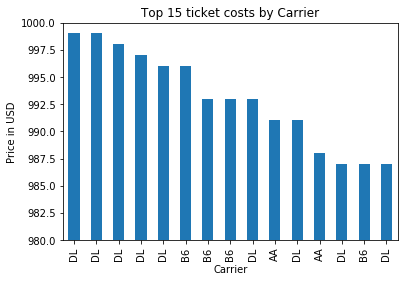

In [4]:
answer.set_index("carrier_id").price.head(15).plot(kind = "bar")
plt.title("Top 15 ticket costs by Carrier")
plt.ylim(980,1000)
plt.ylabel("Price in USD")
plt.xlabel('Carrier')


**For all the direct flights from Seattle to Boston by Alaska Airlines Inc., visualize the average cost of a ticket by day of the week.**

In [5]:
subset = flights[(flights.origin_city == 'Seattle WA') & 
        (flights.dest_city == 'Boston MA') & (flights.carrier_id == "AS")]
group = subset.groupby("day_of_week")

([<matplotlib.axis.XTick at 0x22a15f88188>,
 <a list of 7 Text xticklabel objects>)

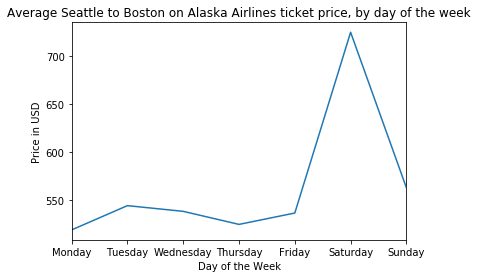

In [6]:
group.mean().price.plot()
plt.ylabel("Price in USD")
plt.xlabel("Day of the Week")
plt.title("Average Seattle to Boston on Alaska Airlines ticket price, by day of the week")
plt.xticks([1,2,3,4,5,6,7], ["Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] )


***Open-ended: Which flights would you recommend I consider if I wanted to travel as far as possible in the least amount of time from Seattle? Include any relevant tables/charts in your answer.***

In [7]:
results = flights[(flights.origin_city == "Seattle WA") & (flights.canceled == 0)].sort_values(by = ["actual_time", "distance"], ascending = [True, False])

print("According to the dataset, it's possible to get " + str(results.iloc[0].distance) + " miles in " + str(results.iloc[0].actual_time) + 
      " minutes by taking Flight Number " + str(results.iloc[0].flight_num) + " on Carrier " + str(results.iloc[0].carrier_id) + ".  \nThis is a flight from " +
      str(results.iloc[0].origin_city) + " to " + str(results.iloc[0].dest_city) + ".")

According to the dataset, it's possible to get 2401 miles in 15 minutes by taking Flight Number 104818 on Carrier CO.  
This is a flight from Seattle WA to Newark NJ.


**Subjectively, since that would be Mach 12, this seems highly suspicious, and is more likely a problem with the dataset. To resolve this, we need to introduce some data cleaning methods.**


In [8]:
# We'll make a new dataset to work with by cleaning the data for the invalid cases.
# Examining the dataset for a ratio between "actual_time" and "distance", we'll try to find
# an average ratio between them so we know what is "normal".

stats = flights[(flights.origin_city == "Seattle WA") & (flights.canceled == 0)].agg({"actual_time" : "mean", "distance" : "mean"})
avgRatio = stats[0]/stats[1]
print(avgRatio)

0.14457959387532918


In [9]:
# Our average ratio is around 14.5.  By contrast, our above bad case is .006.
# We can safely say that anything with a rate better than 0.05 represents bad data and exclude them from the dataset.

cleanFlights = flights[(flights.origin_city == "Seattle WA") & (flights.canceled == 0) & (flights.actual_time / flights.distance > 0.05)]

# Normally this kind of prep would be the first step, 
# and we might perform other steps to catch other sorts of errors depending on need.

In [10]:
# We'll perform the same test again, but on the cleaned Dataset.

results = cleanFlights[(cleanFlights.origin_city == "Seattle WA") & (cleanFlights.canceled == 0)].sort_values(by = ["actual_time", "distance"], ascending = [True, False])

print("According to the dataset, it's possible to get " + str(results.iloc[0].distance) + " miles in " + str(results.iloc[0].actual_time) + 
      " minutes by taking Flight Number " + str(results.iloc[0].flight_num) + " on Carrier " + str(results.iloc[0].carrier_id) + ".  \nThis is a flight from " +
      str(results.iloc[0].origin_city) + " to " + str(results.iloc[0].dest_city) + ".")

results.head()

According to the dataset, it's possible to get 399 miles in 32 minutes by taking Flight Number 949405 on Carrier OO.  
This is a flight from Seattle WA to Boise ID.


,fid,month_id,day_of_month,day_of_week,carrier_id,flight_num,origin_city,origin_state,dest_city,dest_state,departure_delay,taxi_out,arrival_delay,canceled,actual_time,distance,capacity,price
949404,949405,7,8,5,OO,4581,Seattle WA,Washington,Boise ID,Idaho,52,21,62,0,32,399,6,761
610177,610178,7,25,1,WN,1678,Seattle WA,Washington,Spokane WA,Washington,0,12,-22,0,33,224,0,562
555194,555195,7,6,3,WN,1216,Seattle WA,Washington,Spokane WA,Washington,10,5,-10,0,35,224,14,186
381233,381234,7,4,1,OO,6342,Seattle WA,Washington,Portland OR,Oregon,-10,6,-18,0,37,129,19,999
388343,388344,7,9,6,OO,6346,Seattle WA,Washington,Portland OR,Oregon,14,5,6,0,37,129,1,582


**This gives you the best time to miles ratio you can get, but that isn't necessarily what people think about when they think about the question asked.**<p>
***The more compelling way to think about this question is actually "Given that I want to go very far, what is the fastest I can go that far?***

In [11]:
results = cleanFlights[(cleanFlights.origin_city == "Seattle WA") & (cleanFlights.canceled == 0)].sort_values(by = ["distance", "actual_time"], ascending = [False, True])

print("The farthest flight from Seattle is to " + str(results.iloc[0].dest_city) + " at " + str(results.iloc[0].distance) + " miles.  ")
print("The fastest flight to travel that far is Flight number " + str(results.iloc[0].flight_num) + " on Carrier " + str(results.iloc[0].carrier_id) + ".  ")
print("The flight should take " + str(results.iloc[0].actual_time) + " minutes.")

results.head()

The farthest flight from Seattle is to Miami FL at 2724 miles.  
The fastest flight to travel that far is Flight number 60201 on Carrier AS.  
The flight should take 323 minutes.


,fid,month_id,day_of_month,day_of_week,carrier_id,flight_num,origin_city,origin_state,dest_city,dest_state,departure_delay,taxi_out,arrival_delay,canceled,actual_time,distance,capacity,price
60200,60201,7,1,5,AS,16,Seattle WA,Washington,Miami FL,Florida,44,13,29,0,323,2724,11,118
640503,640504,7,1,5,AA,1070,Seattle WA,Washington,Miami FL,Florida,10,11,-12,0,324,2724,12,932
60201,60202,7,2,6,AS,16,Seattle WA,Washington,Miami FL,Florida,3,13,-4,0,331,2724,13,918
640532,640533,7,30,6,AA,1070,Seattle WA,Washington,Miami FL,Florida,-2,12,-17,0,331,2724,12,375
640514,640515,7,12,2,AA,1070,Seattle WA,Washington,Miami FL,Florida,5,14,-8,0,333,2724,12,769
